In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [98]:
# Read csv file
bank_ds = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_ds.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


1. Read the column description

In [99]:
#check no of rows and columns in dataset
bank_ds.shape

(5000, 14)

In [100]:
#check if any null values
bank_ds.isnull().values.any()

False

Therefore no null values present in the dataset.

In [101]:
#Understand data type of each attrinute
bank_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


CCavg colums which represents average spending on credit cards per month is float. Rest other colums have data of int type.

In [102]:
# Description or 5 point Summary
bank_ds.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Minimum value for experience has a negative value, we should clean these negative values with median

In [103]:
#Check for number of records having negative value for experience
bank_ds.Experience[bank_ds.Experience < 0].count()

52

In [104]:
#Replace negative values of Experience with median as experience cannot be negative
bank_ds.loc[bank_ds.Experience < 0, 'Experience'] = bank_ds.Experience[bank_ds.Experience > 0].median()
bank_ds.Experience[bank_ds.Experience < 0].count()

0

2. Study the data distribution in each attribute, share your findings

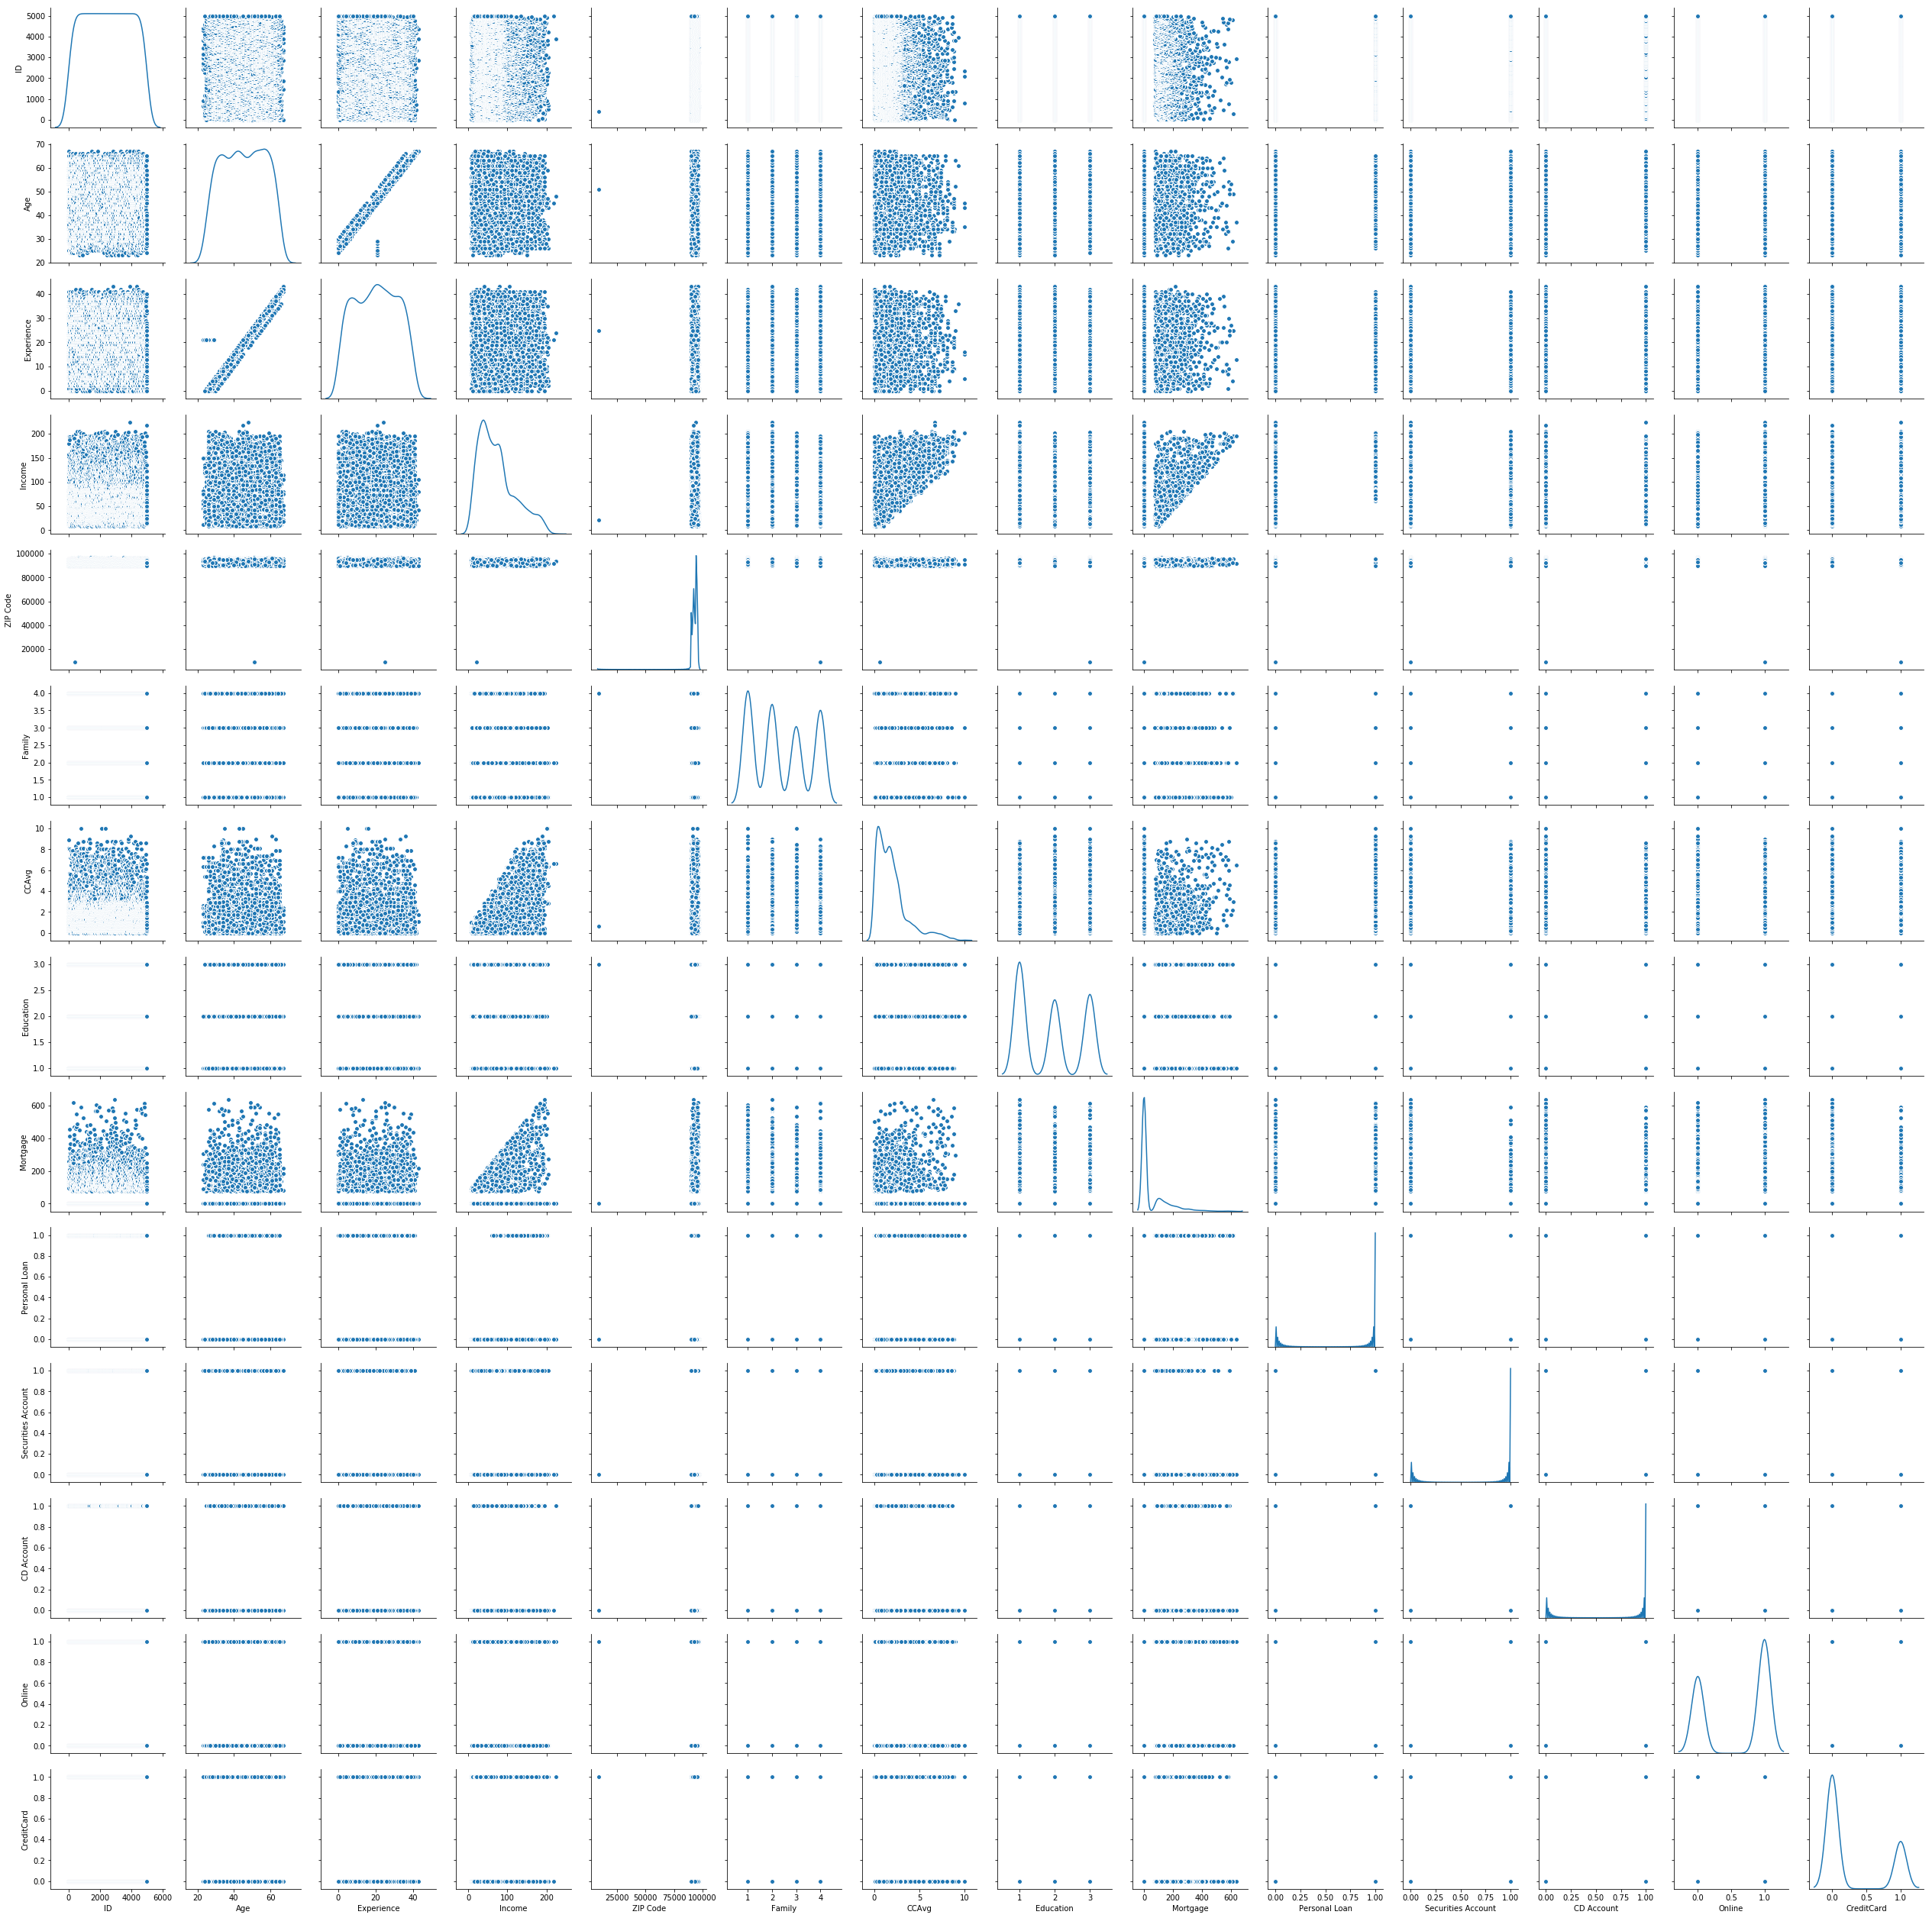

In [105]:
sns.pairplot(bank_ds, diag_kind='kde')

Above pairplot shows
Experience and Age have a positive corelation


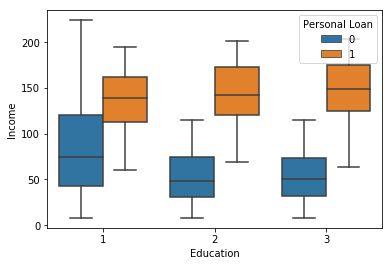

In [106]:
sns.boxplot(x= 'Education', y = 'Income', hue= 'Personal Loan', data = bank_ds)

Strangely undergraduate have higher income than graduate & advanced professional
People who took loan belong to similar income levels. Aslo people who have income less than around 100K are more likely to take personal loan

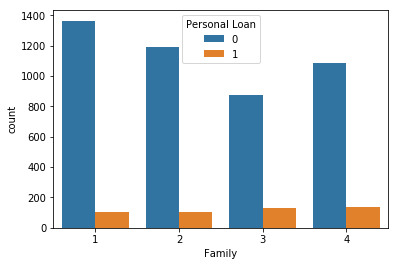

In [107]:
sns.countplot(x='Family', hue= 'Personal Loan', data = bank_ds)

Number of family members does not impact Person loan significantly. 
Families with higher number of memebers may have more likelihood of taking personal loan

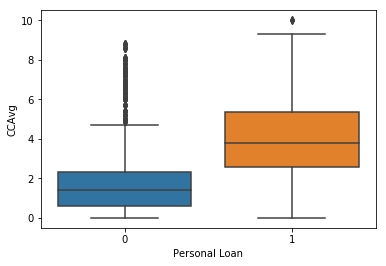

In [108]:
sns.boxplot(x = 'Personal Loan', y = 'CCAvg', data = bank_ds )

People having higher Avg. spending on credit cards per month are more likely to take personal. 
However there are some outliers for people who have not taken loan but have high CCAvg

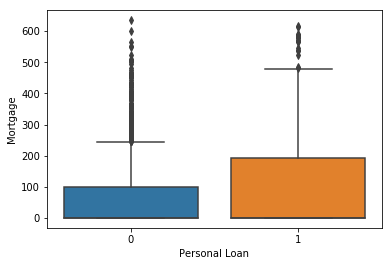

In [109]:
sns.boxplot(x = 'Personal Loan', y = 'Mortgage', data = bank_ds )

People with personal loan have higher mortgage. There are good amount of outliers for Mortgage in dataset.

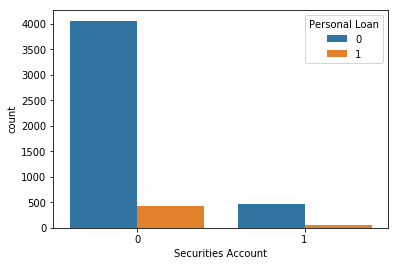

In [110]:
sns.countplot(x = 'Securities Account', hue ='Personal Loan', data = bank_ds)

Majority of people who do not have Securities Account, do not have Personal Loan

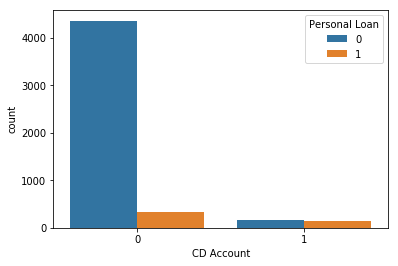

In [111]:
sns.countplot(x = 'CD Account', hue='Personal Loan', data = bank_ds)

Majority of the cutsomers who do not have CD Account, dont have Personal Loan
Mostly the customers who have CD Account have Personal Loan as well.

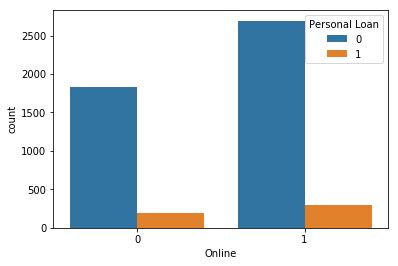

In [112]:
sns.countplot(x = 'Online', hue = 'Personal Loan', data= bank_ds)

Online doesnot seem to influence Personal Loan

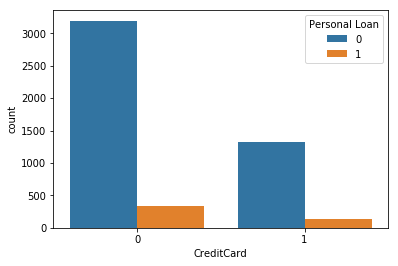

In [113]:
sns.countplot(x = 'CreditCard', hue = 'Personal Loan', data=bank_ds)

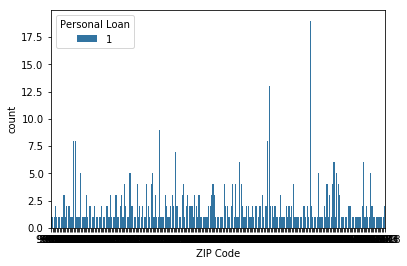

In [114]:
sns.countplot(x='ZIP Code', hue ="Personal Loan", data=bank_ds[bank_ds['Personal Loan']==1])

From the spikes above we can interpret that for few zipcodes number of personal loan taker are higher. 
To see the zip codes which have higher number of personal loan taken

In [115]:
bank_ds[bank_ds['Personal Loan']==1]['ZIP Code'].value_counts().head()

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIP Code, dtype: int64

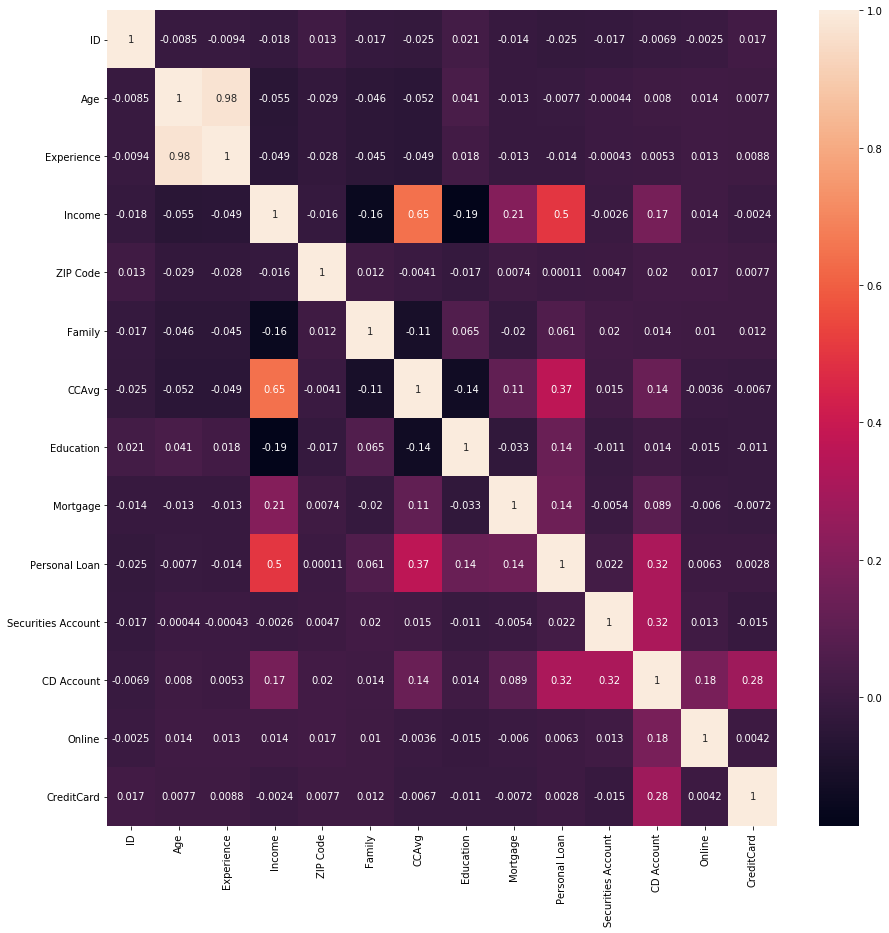

In [116]:
#HeatMap
plt.figure(figsize=(15,15))
sns.heatmap(bank_ds.corr(), annot=True)

Experience and Age have very high positive coorelation if .98
Income and CCavg have good positive co-relation of .65


3. Get the target column distribution. Your comments

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


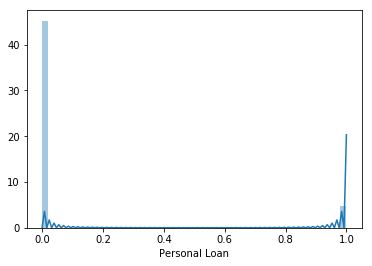

In [117]:
sns.distplot(bank_ds['Personal Loan'])

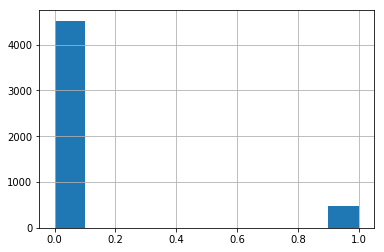

In [118]:
bank_ds['Personal Loan'].hist()

Count for no personal loan category is much higher than count for yes personal loan category

In [119]:
bank_ds.groupby('Personal Loan').agg({'Personal Loan': 'count'})

,Personal Loan
Personal Loan,
0,4520
1,480


Number of customers who took Personal Loan: 480 (9.60%)
Number of customers who did not take Personal Loan: 4520  (90.40%)

4. Split the data into training and test set in the ratio of 70:30 respectively 

In [120]:
#Since we observed high corelation of .98 between Experience and Age, therefore dropping one of them before we start with modelling
bank_ds.drop('Experience', axis=1, inplace = True)
#Dropping Id colum
bank_ds.drop('ID', axis=1, inplace = True)

In [121]:
#Since we obsered high number of outlier for Mortgage. Applying data correction for that column
bank_ds['Mortgage_zscore'] = np.abs(stats.zscore(bank_ds.Mortgage))
#Taking threshold of Z-Score as 3 
bank_ds = bank_ds[bank_ds.Mortgage_zscore < 3]
bank_ds.drop('Mortgage_zscore', axis=1, inplace=True)
bank_ds.shape

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(4895, 11)

In [122]:
Y = bank_ds['Personal Loan']
X = bank_ds.drop('Personal Loan', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# check split of data
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(bank_ds.loc[bank_ds['Personal Loan'] == 1]), (len(bank_ds.loc[bank_ds['Personal Loan'] == 1])/len(bank_ds.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(bank_ds.loc[bank_ds['Personal Loan'] == 0]), (len(bank_ds.loc[bank_ds['Personal Loan'] == 0])/len(bank_ds.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))


Original Personal Loan True Values    : 433 (8.85%)
Original Personal Loan False Values   : 4462 (91.15%)

Training Personal Loan True Values    : 305 (8.90%)
Training Personal Loan False Values   : 3121 (91.10%)

Test Personal Loan True Values        : 128 (8.71%)
Test Personal Loan False Values       : 1341 (91.29%)


In [123]:
#we can use stratify sampling to maintain distribution of dependent variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=bank_ds['Personal Loan'], random_state=1)
# check split of data
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(bank_ds.loc[bank_ds['Personal Loan'] == 1]), (len(bank_ds.loc[bank_ds['Personal Loan'] == 1])/len(bank_ds.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(bank_ds.loc[bank_ds['Personal Loan'] == 0]), (len(bank_ds.loc[bank_ds['Personal Loan'] == 0])/len(bank_ds.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))


Original Personal Loan True Values    : 433 (8.85%)
Original Personal Loan False Values   : 4462 (91.15%)

Training Personal Loan True Values    : 303 (8.84%)
Training Personal Loan False Values   : 3123 (91.16%)

Test Personal Loan True Values        : 130 (8.85%)
Test Personal Loan False Values       : 1339 (91.15%)


5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

In [124]:
#Logistic Regression
logistic_model = LogisticRegression(solver="liblinear")
logistic_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
print("Accuracy on training set:", logistic_model.score(X_train, Y_train))
print("Accuracy on testing set:", logistic_model.score(X_test, Y_test))

Accuracy on training set: 0.9521307647402218
Accuracy on testing set: 0.9503063308373043


In [126]:
#predict on test
Y_predict_logistic_model = logistic_model.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_predict_logistic_model))
print(metrics.classification_report(Y_test, Y_predict_logistic_model))

0.9503063308373043
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1339
          1       0.83      0.55      0.66       130

avg / total       0.95      0.95      0.95      1469



In [127]:
#Scale the data using using StandardScaler and see impact on accuracy
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [128]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, Y_train)
print("Accuracy on training set:", logistic_model.score(X_train_scaled, Y_train))
print("Accuracy on test set:", logistic_model.score(X_test_scaled, Y_test))

Accuracy on training set: 0.9562171628721541
Accuracy on test set: 0.9523485364193329


In [129]:
#predict on test
Y_predict_logistic_model = logistic_model.predict(X_test_scaled)
print(metrics.accuracy_score(Y_test, Y_predict_logistic_model))
print(metrics.classification_report(Y_test, Y_predict_logistic_model))

0.9523485364193329
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1339
          1       0.81      0.61      0.69       130

avg / total       0.95      0.95      0.95      1469



Accuracy has improved to 95.3% for test set from 91.6% on scaling
Recall and Precision values have also improved

In [181]:
#KNN Classifiers
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [182]:
print("Accuracy on training set:", knn_model.score(X_train_scaled, Y_train))
print("Accuracy on testing set:", knn_model.score(X_test_scaled, Y_test))

Accuracy on training set: 0.9708114419147694
Accuracy on testing set: 0.9591558883594282


In [177]:
Y_predict_knn_model = knn_model.predict(X_test_scaled)
print(metrics.accuracy_score(Y_test, Y_predict_knn_model))
print(metrics.classification_report(Y_test, Y_predict_knn_model))

0.9639210347174949
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1339
          1       0.94      0.63      0.76       130

avg / total       0.96      0.96      0.96      1469



In [133]:
#Naive Bayes
naive_model = GaussianNB()
naive_model.fit(X_train_scaled, Y_train)

GaussianNB(priors=None)

In [134]:
print("Accuracy on training set:", naive_model.score(X_train_scaled, Y_train))
print("Accuracy on testing set:", naive_model.score(X_test_scaled, Y_test))

Accuracy on training set: 0.8949211908931699
Accuracy on testing set: 0.8904016337644656


In [135]:
Y_predict_naive_model = naive_model.predict(X_test_scaled)
print(metrics.accuracy_score(Y_test, Y_predict_naive_model))
print(metrics.classification_report(Y_test, Y_predict_naive_model))

0.8904016337644656
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      1339
          1       0.41      0.56      0.48       130

avg / total       0.91      0.89      0.90      1469



6. Print the confusion matrix for all the above models 

In [136]:
#Function to plot confusion matrics
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["Predicted 1", "Predicted 0"] )
    plt.ylabel('Predicted label')
    plt.xlabel('Truth label')
    plt.show()

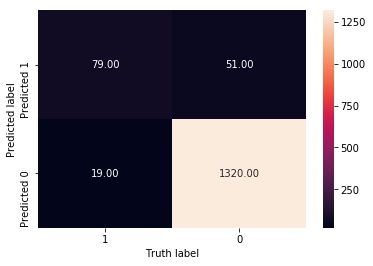

In [137]:
#Confusion matrix for Logistis Regression Model
draw_cm( Y_test, Y_predict_logistic_model)

Therefore 79 are True Positives (who opted for Perrsonal Loan and predicted also same) and 1320 are true negatives (who did not opt for Personal Loan and predicted also same).
Type1 Error (False Positive): There 51 customers who did not opt for Loan but they were predicted to take loan
Type 2 Error (False Negative): There are 19 customers who were predicted not to take loan but did take loan

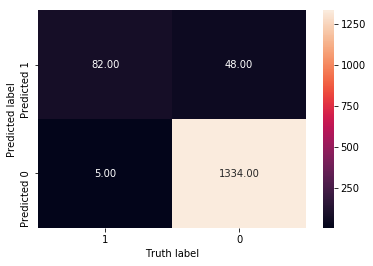

In [183]:
#Confusion matrix for KNN Model
draw_cm( Y_test, Y_predict_knn_model)

Therefore 82 are True Positive (who opted for Perrsonal Loan and predicted also same) and 1334 are true negative (who did not opt for Personal Loan and predicted also same).
Type1 Error (False Positive): There 48 customers who did not take Loan but it was predicted that they would take loan
Type 2 Error (False Negative): There are 5 customers who took loan but they were predicted that they will not

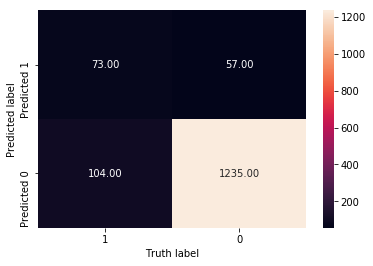

In [139]:
#Confusion matrix for KNN Model
draw_cm( Y_test, Y_predict_naive_model)

Therefore 73 are True Positive (who opted for Perrsonal Loan and predicted also same) and 1235 are true negative (who did not opt for Personal Loan and predicted also same).
Type1 Error (False Positive): There 57 customers who did not take loan but it was predicted that they would take loan
Type 2 Error (False Negative): There are 104 customers who took loan but it was predicted that they will not take loan

7. Give your reasoning on which is the best model in this case and why it performs better?

In [140]:
#ROC Curve for Logistic Regression model
prob_lr = logistic_model.predict_proba(X_test_scaled)
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(Y_test, prob_lr[:,1])
roc_auc_lg = metrics.auc(fpr_lr, tpr_lr)
print('Area Under ROC Cure with Logistic Regression Model:', roc_auc_lg)

Area Under ROC Cure with Logistic Regression Model: 0.9508358706267593


In [184]:
#ROC Curve for KNN Classifiers model
prob_knn = knn_model.predict_proba(X_test_scaled)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(Y_test, prob_knn[:,1])
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
print('Area Under ROC Cure with KNN Classifiers Model:', roc_auc_knn)

Area Under ROC Cure with KNN Classifiers Model: 0.9317803182627679


In [153]:
#ROC Curve for Naive Bayes model
prob_nb = naive_model.predict_proba(X_test_scaled)
fpr_nb, tpr_nb, thresholds_nb = metrics.roc_curve(Y_test, prob_nb[:,1])
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
print('Area Under ROC Cure with Naive bayes Model:', roc_auc_nb)

Area Under ROC Cure with Naive bayes Model: 0.9244154650427989


Naive Bays Models has least accuracy of 89%. Also Type 2 Error(FN) isvery high value of 104. Recall value of 0.56 is also less in comparison to other models.
Logistic Regression has an accuracy of 95.2 % with Recall value of 0.61. Type 2 Error(FN) value is 19. This model performs better than Naive Bay's model.
KNN Classifier has highest accuracy of 96.3% with Recall value of 0.63. Type 2 Error(FN) value is 5 which is least among all three models & is a good indicator as only 5 customers who took loan were predicted wrongly as that they will not take loan. This model performs best.